___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this assignment, you must apply ***EDA*** processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges. 

Also, this project aims to improve your ability to implement algorithms for ***Multi-Class Classification***. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

---
---

# #Determines

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.
***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (forest, trees) knowledge on the internet to get to know the data set in the fastest way. 

You should implement cleaning, handling with outliers and missing values using Pandas, NumPy and other required modules for the best result in modeling. You should do Feature Engineering.

After that, your final dataset with the new variables you have created will be ready for model building. You will implement ***Support Vector Machine, XGBoost, Random Forest, Desicion Tree*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, create a chart comparing the performance of all models and choose the most successful model.


---
---

# #Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Load Dataset*
    
    *iii. Explore Data*

#### 2.  Data Cleaning
- Detect Missing Values and Outliers 

    *i. Missing Value Detection*
    
    *ii. Outlier Detection*
    
- Deal with Outliers
    
    *i. Drop Outliers*


#### 3. Feature Engineering


#### 4. Prediction (Multi-class Classification)
- Import libraries
- Data Preprocessing
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



---
---

## 1. Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

#### *i. Import Libraries*

Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# import pandas_profiling as pp
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score,accuracy_score,precision_score,f1_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('max_columns', 100, 'max_rows', 100)

OptionError: Pattern matched multiple keys

#### *ii. Load Dataset*

In [4]:
df = pd.read_csv('treetypes.csv')

#### *iii. Explore Data*
- Focus on numerical and categorical data
- Detect Number of Unique values of each column
- Focus on Target Variable (Cover_Type)
 - Detect relationships and correlations between independent variables and target variable.
 - It may be nice to visualize the class frequencies of the target variable.
- Detect relationships and correlations between independent variables. (You can prefer to keep only one of the highly correlated continuous variables.)
- Consider dropping features that contain little data or that you think will not contribute to the model.

In [8]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           250000 non-null  int64
 1   Aspect                              250000 non-null  int64
 2   Slope                               250000 non-null  int64
 3   Horizontal_Distance_To_Hydrology    250000 non-null  int64
 4   Vertical_Distance_To_Hydrology      250000 non-null  int64
 5   Horizontal_Distance_To_Roadways     250000 non-null  int64
 6   Hillshade_9am                       250000 non-null  int64
 7   Hillshade_Noon                      250000 non-null  int64
 8   Hillshade_3pm                       250000 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  250000 non-null  int64
 10  Wilderness_Area_1                   250000 non-null  int64
 11  Wilderness_Area_2                   250000 non-null 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,250000.0,2748.505160,418.300975,1859.0,2375.0,2753.0,3108.0,3857.0
Aspect,250000.0,156.212172,109.652847,0.0,65.0,125.0,260.0,360.0
Slope,250000.0,16.331052,8.317490,0.0,10.0,15.0,22.0,65.0
Horizontal_Distance_To_Hydrology,250000.0,228.094032,209.630153,0.0,66.0,180.0,330.0,1390.0
Vertical_Distance_To_Hydrology,250000.0,50.897820,61.006967,-163.0,5.0,32.0,79.0,598.0
Horizontal_Distance_To_Roadways,250000.0,1719.966576,1330.817603,0.0,756.0,1318.0,2294.0,7112.0
Hillshade_9am,250000.0,212.370488,30.654582,0.0,195.0,220.0,235.0,254.0
Hillshade_Noon,250000.0,218.510700,22.680947,0.0,206.0,222.0,235.0,254.0
Hillshade_3pm,250000.0,134.502764,46.033892,0.0,106.0,137.0,167.0,252.0
Horizontal_Distance_To_Fire_Points,250000.0,1521.756904,1107.378373,0.0,734.0,1273.0,1998.0,7150.0


In [14]:
df['Cover_Type'].value_counts()

5    36079
1    35836
2    35780
6    35695
7    35690
4    35529
3    35391
Name: Cover_Type, dtype: int64

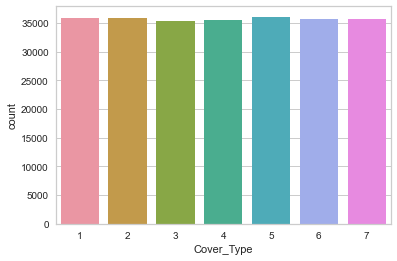

In [15]:
sns.countplot(df['Cover_Type']);

In [21]:
df1 = df[['Elevation','Aspect','Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Wilderness_Area_4', 'Cover_Type']]

In [23]:
df1

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,4
249998,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,5


***
***

## 2.  Data Cleaning

### Detect Missing Values and Outliers

#### *i. Missing Value Detection*

In [28]:
df.isnull().sum().any()

False

#### *ii. Outlier Detection*

The columns which have continuous value should be examined in terms of [outliers](https://datascience.foundation/sciencewhitepaper/knowing-all-about-outliers-in-machine-learning) (Watch out for columns that look like continuous but not continuous!). Some algorithms are [sensitive to outliers](https://arsrinevetha.medium.com/ml-algorithms-sensitivity-towards-outliers-f3862a13c94d), but some algorithms can tolerate them. You can decide to outlier detection according to the algorithm you will use.
- You can check the outliers shape of continous features with respect to the target (Cover_Type) classes.
- You can check how many outliers are there of each continuous variables.
- The columns which have continuous value should be examined in terms of outliers.
- You can define a function to detect outliers in accordance with the ``zscore`` or ``IQR``.

In [35]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2696,123,10,212,48,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1,3269,110,19,134,40,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,3283,322,18,346,104,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
3,2847,89,31,270,175,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
4,3248,93,12,507,118,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,49,17,467,107,151,162,435,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
249996,2872,90,31,251,147,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5
249997,2336,57,5,0,0,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
249998,2563,181,10,0,0,1349,223,246,156,1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5


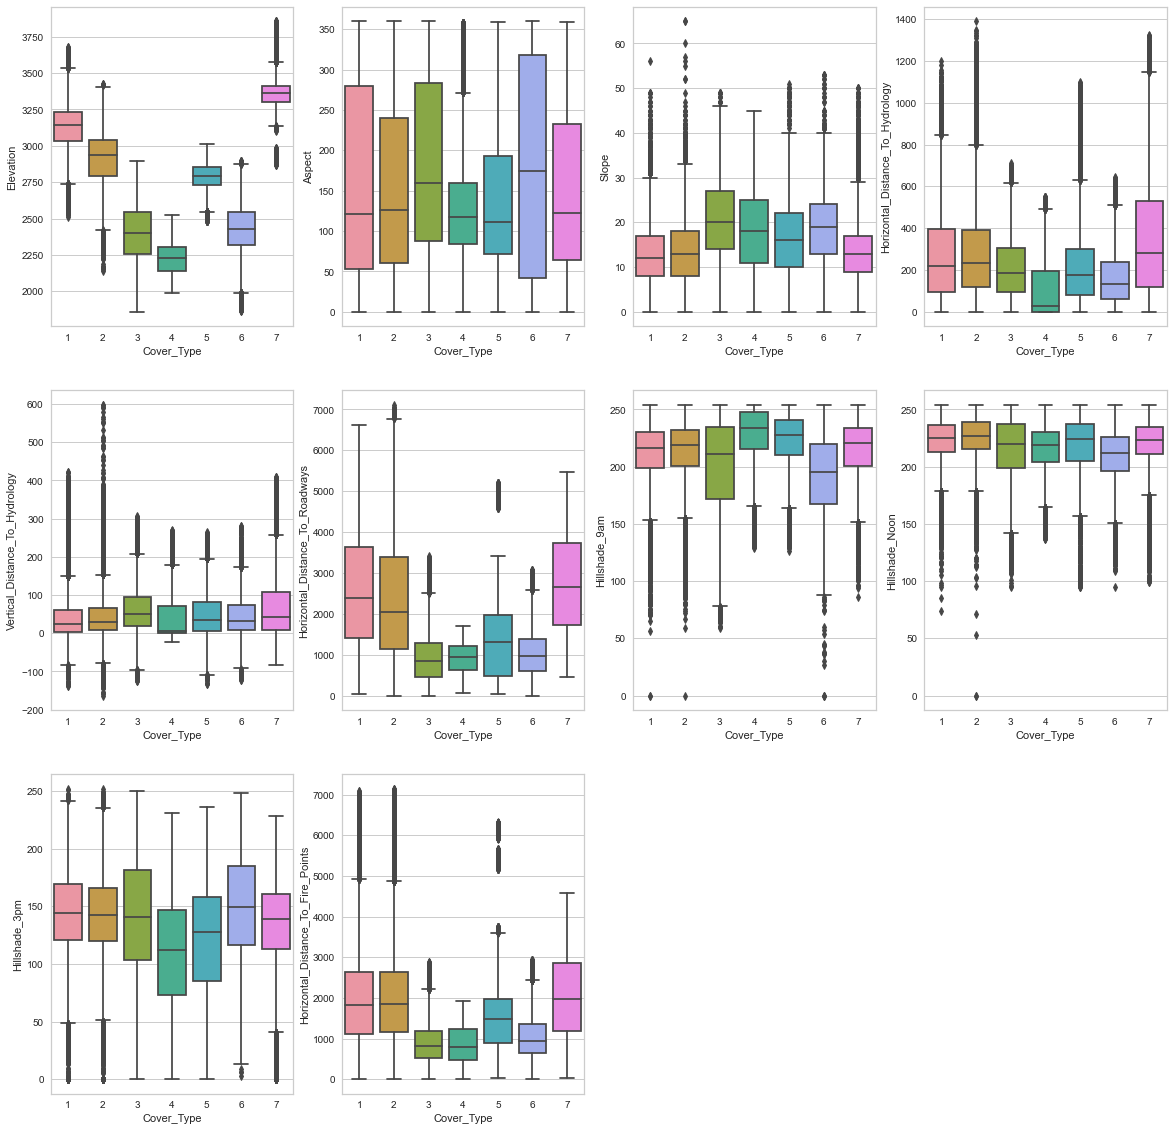

In [37]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns[:10]:
    if feature != "Cover_Type":
        index += 1
        plt.subplot(3,4,index)
        sns.boxplot(x='Cover_Type',y=feature,data=df)


<AxesSubplot:xlabel='Cover_Type', ylabel='Elevation'>

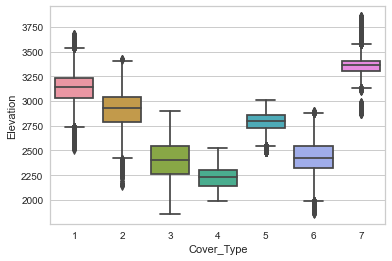

In [41]:
sns.boxplot(x='Cover_Type',y='Elevation',data=df)

In [54]:
df25 = df['Elevation'].quantile(0.25)
df75 = df['Elevation'].quantile(0.75)

IQR = df75-df25

upper_limit = df75 + 1.5 * IQR
lower_limit = df25 - 1.5 * IQR

df[df['Elevation'] > upper_limit]
df[df['Elevation'] < lower_limit]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type


In [63]:
df25 = df['Aspect'].quantile(0.25)
df75 = df['Aspect'].quantile(0.75)

IQR = df75-df25

upper_limit = df75 + (1.5 * IQR)
lower_limit = df25 - (1.5 * IQR)

df[(df['Cover_Type']==1) & (df['Aspect'] > upper_limit)]
df[df['Aspect'] < lower_limit]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type


In [80]:
Q1 = np.percentile(df['Aspect'], 25,interpolation = 'midpoint')
 
Q3 = np.percentile(df['Aspect'], 75,interpolation = 'midpoint')
IQR = Q3 - Q1

IQR

195.0

In [89]:
# upper = df['Aspect'] >= (Q3+1.5*IQR)
# df[df['Aspect']<upper] 

lower = df['Horizontal_Distance_To_Fire_Points'] <= (Q1-1.5*IQR)
df[df['Horizontal_Distance_To_Fire_Points']<lower] 

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type


### Deal with Outliers

#### *ii. Drop Outliers*

### Now, let's take a closer look at correlation of continuous columns.

***
***

## 3. Feature Engineering

### My Plan of Feature Extraction
- First, I decided to produce&transform a new column with ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns. New column will contain the values of **Hypotenuse** of ``horizantal`` and ``vertical`` distances.

- As second, we can produce&transform an additional column which contains **average** of Horizantal Distances to Hydrology and Roadways.

- Third, I decided to transform a new column which contains **average** of `Elevation` and ``Vertical_Distance_To_Hydrology`` columns. So that, there is no need to have ``Horizontal_Distance_To_Hydrology`` and ``Vertical_Distance_To_Hydrology`` columns, because I have new columns which represent more value than them. I decide to drop these columns.

- Note that, after seeing the result of the models, there may be a possibility of making minor changes to the features in the modeling phase.

In [96]:
df['Distance_To_Hydrology']=np.sqrt(((df['Horizontal_Distance_To_Hydrology']*df['Horizontal_Distance_To_Hydrology'])+(df['Vertical_Distance_To_Hydrology']*df['Vertical_Distance_To_Hydrology']))).astype(int)
df['Distance_To_Hydrology']

0          217
1          139
2          361
3          321
4          520
          ... 
249995      51
249996     290
249997       0
249998       0
249999    1154
Name: Distance_To_Hydrology, Length: 250000, dtype: int32

In [99]:
df['Source_Distance']=(df['Distance_To_Hydrology']+df['Horizontal_Distance_To_Roadways'])/2
df['Source_Distance']

0         1231.0
1         1936.5
2         2365.0
3          820.5
4          545.0
           ...  
249995     259.0
249996    1158.5
249997     714.5
249998     674.5
249999    3129.5
Name: Source_Distance, Length: 250000, dtype: float64

In [104]:
df['Average_Elevation']=(df['Elevation']+df['Vertical_Distance_To_Hydrology'])/2
df['Average_Elevation']

0         1372.0
1         1654.5
2         1693.5
3         1511.0
4         1683.0
           ...  
249995    1064.5
249996    1509.5
249997    1168.0
249998    1281.5
249999    2015.5
Name: Average_Elevation, Length: 250000, dtype: float64

In [106]:
df.drop(columns=['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], inplace=True)

In [107]:
df

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3,Wilderness_Area_4,Soil_Type_1,Soil_Type_2,Soil_Type_3,Soil_Type_4,Soil_Type_5,Soil_Type_6,Soil_Type_7,Soil_Type_8,Soil_Type_9,Soil_Type_10,Soil_Type_11,Soil_Type_12,Soil_Type_13,Soil_Type_14,Soil_Type_15,Soil_Type_16,Soil_Type_17,Soil_Type_18,Soil_Type_19,Soil_Type_20,Soil_Type_21,Soil_Type_22,Soil_Type_23,Soil_Type_24,Soil_Type_25,Soil_Type_26,Soil_Type_27,Soil_Type_28,Soil_Type_29,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type,Distance_To_Hydrology,Source_Distance,Average_Elevation
0,2696,123,10,2245,237,231,123,2113,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,217,1231.0,1372.0
1,3269,110,19,3734,249,216,88,3960,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,139,1936.5,1654.5
2,3283,322,18,4369,170,217,185,1330,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7,361,2365.0,1693.5
3,2847,89,31,1320,248,173,29,889,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,321,820.5,1511.0
4,3248,93,12,570,239,221,110,945,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,7,520,545.0,1683.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,2112,339,39,467,107,151,162,435,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,51,259.0,1064.5
249996,2872,90,31,2027,248,172,27,508,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,290,1158.5,1509.5
249997,2336,57,5,1429,224,228,139,387,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,714.5,1168.0
249998,2563,181,10,1349,223,246,156,1007,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,674.5,1281.5


***
***

## 4. Prediction (Multi-class Classification)

If you have done, use your data set resulting from Feature Engineering task. If you haven't done Feature Engineering, use the latest version of your data set.
In this section, you have two main tasks that apply to each algorithm:
1. Model Building and Prediction

 - SVM (Use ``LinearSVC`` model from``sklearn.svm`` module)
 - Decision Tree (Use ``DecisionTreeClassifier`` model from ``sklearn.tree`` module)
 - Random Forest (Use ``RandomForestClassifier`` model from ``sklearn.ensemble`` module) 
 - XGBoost (Use ``XGBClassifier`` model from``xgboost`` module)

2. Visualizing the Result

- Use [yellowbrick](https://www.scikit-yb.org/en/latest/), [seaborn](https://seaborn.pydata.org/tutorial/regression.html) or [matplotlib](https://matplotlib.org/) modules to visualize the model results.

- Show three plots for the results:
 - Class Prediction Error Bar Plot
 - Confusion Matrix
 - Classification Report

### Import Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

### Data Preprocessing

- Drop target variable
- Train-Test Split

*Note: You can use the train and test data generated here for all algorithms.*

In [ ]:
X = df.drop("Cover_Type", axis = 1)
y = df["Cover_Type"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Implement Support Vector Machine
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

*Note: You probably won't get a successful result. You may need to make some changes to the model or data. This may be a topic worth investigating, you decide.*

### Implement Decision Tree Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement Random Forest Classifier
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

### Implement XGBoost Classifer
- Import the modul 
- Fit the model 
- Predict the test set
- Visualize and evaluate the result (use yellowbrick module)

In [ ]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
y_pred = xgb.predict(X_test)

In [ ]:
xgb_f1 = f1_score(y_test, y_pred, average='micro')
xgb_recall = recall_score(y_test, y_pred, average='micro')

In [ ]:
y_train_pred = xgb_grid.predict(X_train)

In [ ]:
xgb.feature_importances_

In [ ]:
feat = pd.DataFrame(index=X.columns,data=xgb.feature_importances_,columns=['Importance'])
feat

In [ ]:
imp_feats = feat.sort_values("Importance")

### Compare The Models

So far, you have created a multi-classifier model with 4 different algorithms and made predictions. You can observe the performance of the models together with a barplot of your choice.

- Which algorithm did you achieve the highest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

In contrast;

- Which algorithm did you achieve the lowest prediction performance with? 
- What could be the factors that cause this? What are the principles of the most successful algorithm and its differences from other algorithms? 

The answers you will look for to these questions will increase your gains from Machine Learning course.

# Accuracy Comparison

# F1 Score Comparison

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___